Transfer Learning CIFAR10

Train a simple convnet on the CIFAR dataset the first 5 output classes [0..4].
Freeze convolutional layers and fine-tune dense layers for the last 5 ouput classes [5..9].

1. Import CIFAR10 data and create 2 datasets with one dataset having classes from 0 to 4 and other having classes from 5 to 9

In [0]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
import keras

import math

import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

In [0]:
from keras.datasets import cifar10

In [0]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


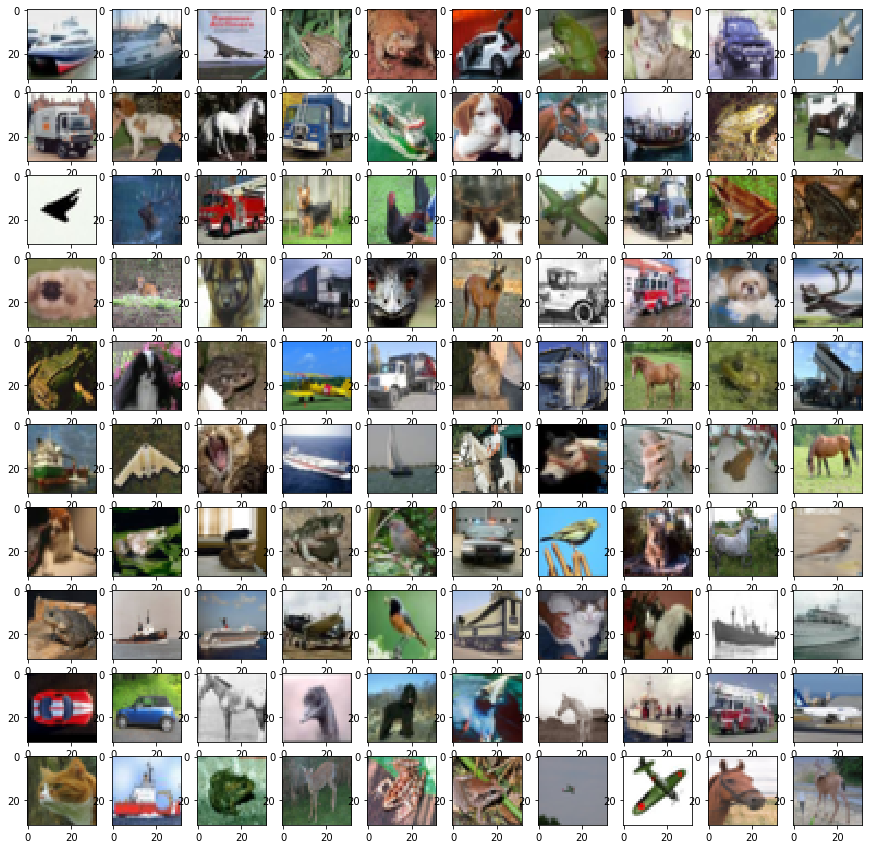

In [0]:
import matplotlib.pyplot as plt
w=10
h=10
fig=plt.figure(figsize=(15, 15))
columns = 10
rows = 10
for i in range(1, columns*rows +1):
    img = x_test[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()

In [0]:
# Divide data in 2 data set with class 0-4 and 5-9
x_train0_4=[]
x_test0_4=[]
y_train0_4=[]
y_test0_4=[]
x_train5_9=[]
x_test5_9=[]
y_train5_9=[]
y_test5_9=[]

for xx in range(y_train.shape[0]):
    if y_train[xx] < 5:
        # put data in set 1
        x_train0_4.append(x_train[xx]/255.0)
        y_train0_4.append(y_train[xx])
    else:
        # put data in set 2
        x_train5_9.append(x_train[xx]/255.0)
        y_train5_9.append(y_train[xx])

for xx in range(y_test.shape[0]):
    if y_test[xx] < 5:
        # put data in set 1
        x_test0_4.append(x_test[xx]/255.0)
        y_test0_4.append(y_test[xx])
    else:
        # put data in set 2
        x_test5_9.append(x_test[xx]/255.0)
        y_test5_9.append(y_test[xx])


Check
Verify shapes of x_train, y_train, x_test and y_test for both the datasets with the below given shapes.

In [0]:
x_train0_4 = np.asarray(x_train0_4).reshape((-1, 32, 32, 3))
x_test0_4 = np.asarray(x_test0_4).reshape((-1, 32, 32, 3))
x_train5_9 = np.asarray(x_train5_9).reshape((-1, 32, 32, 3))
x_test5_9 = np.asarray(x_test5_9).reshape((-1, 32, 32, 3))

print(x_train0_4.shape,x_test0_4.shape)
print(x_train5_9.shape ,x_test5_9.shape)

(25000, 32, 32, 3) (5000, 32, 32, 3)
(25000, 32, 32, 3) (5000, 32, 32, 3)


***2. Use One-hot encoding to divide y_train and y_test into required no of output classes***



In [0]:
#One Hot Encoding
y_train0_4 = np_utils.to_categorical(np.asarray(y_train0_4),5)
y_test0_4 = np_utils.to_categorical(np.asarray(y_test0_4), 5)

y_train5_9= np.asarray(y_train5_9)-5
y_test5_9= np.asarray(y_test5_9)-5
y_train5_9 = np_utils.to_categorical(y_train5_9,5)
y_test5_9 = np_utils.to_categorical(y_test5_9, 5)

In [0]:
y_train0_4

array([[0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [0]:
y_test0_4

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

***3. Build a sequential neural network model which can classify the classes 0 to 4 of CIFAR10 dataset with at least 80% accuracy on test data***


In [0]:
#Define/Initialize Sequential model
model = Sequential()

# Conv2D Layer
model.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 3), activation='relu'))
model.add(Convolution2D(32, 3, 3, activation='relu'))

# Max Pooling 
model.add(MaxPooling2D(pool_size=(2,2)))

# Dropout Layer
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
#model.add(Dropout(0.25))


model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dense(5))
model.add(Activation('softmax'))

model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train0_4, y_train0_4,
         epochs=10,
         batch_size=32,
         validation_data=(x_test0_4, y_test0_4))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 64)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., activation="relu")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  """


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 25000 samples, validate on 5000 samples
Epoch 1/10





25000/25000 [==============================] - 110s 4ms/step - loss: 1.0403 - acc: 0.5763 - val_loss: 0.8360 - val_acc: 0.6758
Epoch 2/10
25000/25000 [==============================] - 106s 4ms/step - loss: 0.7975 - acc: 0.6854 - val_loss: 0.7281 - val_acc: 0.7136
Epoch 3/10
25000/25000 [==============================] - 106s 4ms/step - loss: 0.6737 - acc: 0.7415 - val_loss: 0.6115 - val_acc: 0.7668
Epoch 4/10
25000/25000 [==============================] - 106s 4ms/step - loss: 0.5835 - acc: 0.7764 - val_loss: 0.5546 - val_acc: 0.7938
Epoch 5/10
25000/25000 [==============================] - 106s 4ms/step - loss: 0.5089 - acc: 0.8066 - val_loss: 0.5438 - val_acc: 0.7980
Epoch 6/10
25000/25000 [==============================] - 105s 4ms/step - loss: 0.4634 - acc: 0.8247 - val_loss: 0.5678 - val_acc: 0.7864
Epoch 7/10
25000/2500

***4. In the model which was built above (for classification of classes 0-4 in CIFAR10), make only the dense layers to be trainable and conv layers to be non-trainable***

In [0]:
#Freezing layers in the model which don't have 'dense' in their name
for layer in model.layers:
  if('dense' not in layer.name): #prefix detection to freeze layers which does not have dense
    #Freezing a layer
    layer.trainable = False

### 5. Utilize the the model trained on CIFAR 10 (classes 0 to 4) to classify the classes 5 to 9 of CIFAR 10  (Use Transfer Learning) <br>
Achieve an accuracy of more than 85% on test data

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train5_9, y_train5_9,
          batch_size=32,
          epochs=10,
          verbose=1,
          validation_data=(x_test5_9, y_test5_9))

Train on 25000 samples, validate on 5000 samples
Epoch 1/10
25000/25000 [==============================] - 39s 2ms/step - loss: 0.7905 - acc: 0.7351 - val_loss: 0.4821 - val_acc: 0.8248
Epoch 2/10
25000/25000 [==============================] - 39s 2ms/step - loss: 0.4357 - acc: 0.8390 - val_loss: 0.4208 - val_acc: 0.8464
Epoch 3/10
25000/25000 [==============================] - 38s 2ms/step - loss: 0.3684 - acc: 0.8660 - val_loss: 0.4004 - val_acc: 0.8568
Epoch 4/10
25000/25000 [==============================] - 39s 2ms/step - loss: 0.3161 - acc: 0.8846 - val_loss: 0.4072 - val_acc: 0.8554
Epoch 5/10
25000/25000 [==============================] - 39s 2ms/step - loss: 0.2705 - acc: 0.9008 - val_loss: 0.3923 - val_acc: 0.8650
Epoch 6/10
25000/25000 [==============================] - 38s 2ms/step - loss: 0.2359 - acc: 0.9151 - val_loss: 0.3844 - val_acc: 0.8648
Epoch 7/10
25000/25000 [==============================] - 38s 2ms/step - loss: 0.1991 - acc: 0.9271 - val_loss: 0.3948 - val_acc:

## SENTIMENT ANALYSIS
==========================

The objective of the second problem is to perform Sentiment analysis from the tweets data collected from the users targeted at various mobile devices.
Based on the tweet posted by a user (text), we will classify if the sentiment of the user targeted at a particular mobile device is positive or not.

### 6. Read the dataset (tweets.csv) and drop the NA's while reading the dataset

In [0]:
import pandas as pd
data = pd.read_csv('tweets.csv', encoding = "ISO-8859-1").dropna()

In [6]:
data.shape

(3291, 3)

In [7]:
data.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [0]:
data = data[(data['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Positive emotion') | (data['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Negative emotion')]

In [9]:
data.shape

(3191, 3)

In [10]:
data.emotion_in_tweet_is_directed_at.value_counts()

iPad                               918
Apple                              638
iPad or iPhone App                 460
Google                             414
iPhone                             287
Other Google product or service    283
Android App                         80
Android                             77
Other Apple product or service      34
Name: emotion_in_tweet_is_directed_at, dtype: int64

In [11]:
data.is_there_an_emotion_directed_at_a_brand_or_product.value_counts()

Positive emotion    2672
Negative emotion     519
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [0]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [0]:
# define X and y
X = data.tweet_text
y = data.is_there_an_emotion_directed_at_a_brand_or_product

# split the new DataFrame into training and testing sets [Default test size = 25%]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### 7. Represent text as numerical data using `CountVectorizer` and get the document term frequency matrix

#### Use `vect` as the variable name for initialising CountVectorizer.

In [14]:
# Term Frequency
vect = CountVectorizer()
tf = pd.DataFrame(vect.fit_transform(X_train).toarray(), columns=vect.get_feature_names())
tf

,000,02,03,10,100,100s,100tc,101,106,10am,10mins,10x,11,11ntc,11th,12,12b,12th,13,130,14,15,150,1500,150m,157,15k,16162,17,188,1986,1990style,1m,1of,1pm,1st,20,200,2010,2011,...,zelda,zeldman,zero,zip,zite,zms,zombies,zomg,zone,zoom,zzzs,¼¼,á¾_î¾ð,äá,å_,åç,åçwhat,çü,èï,ðü,öý,ù_¾,û_,ûª,ûªll,ûªm,ûªs,ûªt,ûï,ûï35,ûïfoursquare,ûïline,ûïspecials,ûïview,ûò,ûòand,ûó,ûójust,ûólewis,ûóthe
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2389,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2390,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
# Document Frequency
vect = CountVectorizer(binary=True)
df = vect.fit_transform(X_train).toarray().sum(axis=0)
pd.DataFrame(df.reshape(1, 4919), columns=vect.get_feature_names())

,000,02,03,10,100,100s,100tc,101,106,10am,10mins,10x,11,11ntc,11th,12,12b,12th,13,130,14,15,150,1500,150m,157,15k,16162,17,188,1986,1990style,1m,1of,1pm,1st,20,200,2010,2011,...,zelda,zeldman,zero,zip,zite,zms,zombies,zomg,zone,zoom,zzzs,¼¼,á¾_î¾ð,äá,å_,åç,åçwhat,çü,èï,ðü,öý,ù_¾,û_,ûª,ûªll,ûªm,ûªs,ûªt,ûï,ûï35,ûïfoursquare,ûïline,ûïspecials,ûïview,ûò,ûòand,ûó,ûójust,ûólewis,ûóthe
0,5,1,2,12,5,1,1,3,1,1,1,2,6,1,1,4,2,1,5,1,2,13,6,2,1,1,3,1,1,1,1,1,1,1,1,8,5,2,1,20,...,1,1,2,1,1,2,2,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,9,2,4,1,5,3,49,1,1,1,1,1,6,1,7,1,1,1


In [16]:
# Term Frequency-Inverse Document Frequency (simple version)
tf/df

,000,02,03,10,100,100s,100tc,101,106,10am,10mins,10x,11,11ntc,11th,12,12b,12th,13,130,14,15,150,1500,150m,157,15k,16162,17,188,1986,1990style,1m,1of,1pm,1st,20,200,2010,2011,...,zelda,zeldman,zero,zip,zite,zms,zombies,zomg,zone,zoom,zzzs,¼¼,á¾_î¾ð,äá,å_,åç,åçwhat,çü,èï,ðü,öý,ù_¾,û_,ûª,ûªll,ûªm,ûªs,ûªt,ûï,ûï35,ûïfoursquare,ûïline,ûïspecials,ûïview,ûò,ûòand,ûó,ûójust,ûólewis,ûóthe
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,0.0,0.0,0.0,0.083333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2389,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2390,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2391,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# TfidfVectorizer
vect = TfidfVectorizer()
pd.DataFrame(vect.fit_transform(X_train).toarray(), columns=vect.get_feature_names())

,000,02,03,10,100,100s,100tc,101,106,10am,10mins,10x,11,11ntc,11th,12,12b,12th,13,130,14,15,150,1500,150m,157,15k,16162,17,188,1986,1990style,1m,1of,1pm,1st,20,200,2010,2011,...,zelda,zeldman,zero,zip,zite,zms,zombies,zomg,zone,zoom,zzzs,¼¼,á¾_î¾ð,äá,å_,åç,åçwhat,çü,èï,ðü,öý,ù_¾,û_,ûª,ûªll,ûªm,ûªs,ûªt,ûï,ûï35,ûïfoursquare,ûïline,ûïspecials,ûïview,ûò,ûòand,ûó,ûójust,ûólewis,ûóthe
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,0.0,0.0,0.0,0.323538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2389,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2390,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.231731,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2391,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 8. Find number of different words in vocabulary

In [18]:
len(data.tweet_text)

3191

In [19]:
# list of features
print(vect.get_feature_names()[:])

['000', '02', '03', '10', '100', '100s', '100tc', '101', '106', '10am', '10mins', '10x', '11', '11ntc', '11th', '12', '12b', '12th', '13', '130', '14', '15', '150', '1500', '150m', '157', '15k', '16162', '17', '188', '1986', '1990style', '1m', '1of', '1pm', '1st', '20', '200', '2010', '2011', '2012', '20s', '22', '23', '24', '250k', '25th', '2am', '2day', '2honor', '2moro', '2nd', '2nite', '2s', '2yrs', '30', '3000', '30a', '30am', '30p', '30pm', '32', '32gb', '35', '36', '37', '3d', '3g', '3gs', '3rd', '3x', '40', '400', '40min', '41', '45', '45am', '48', '4android', '4chan', '4g', '4sq', '4sq3', '4square', '50', '54', '55', '58', '59p', '59pm', '5pm', '5th', '60', '64g', '64gb', '64gig', '64mb', '65', '6hours', '6th', '70', '75', '7th', '80', '800', '80s', '82', '89', '8am', '8p', '8pm', '8th', '90', '900', '911tweets', '95', '96', '967', '97', '98', '99', '99å', '9th', '__', '______', '_______', '_ã', '_ô', 'a3xvwc6', 'aapl', 'aber', 'able', 'about', 'abroad', 'absolute', 'absolutel

In [20]:
# last 50 features
print(vect.get_feature_names()[-50:])

['yummy', 'zaarly', 'zaarlyiscoming', 'zagg', 'zaggle', 'zappos', 'zazzle', 'zazzlesxsw', 'zazzlsxsw', 'ze', 'zelda', 'zeldman', 'zero', 'zip', 'zite', 'zms', 'zombies', 'zomg', 'zone', 'zoom', 'zzzs', '¼¼', 'á¾_î¾ð', 'äá', 'å_', 'åç', 'åçwhat', 'çü', 'èï', 'ðü', 'öý', 'ù_¾', 'û_', 'ûª', 'ûªll', 'ûªm', 'ûªs', 'ûªt', 'ûï', 'ûï35', 'ûïfoursquare', 'ûïline', 'ûïspecials', 'ûïview', 'ûò', 'ûòand', 'ûó', 'ûójust', 'ûólewis', 'ûóthe']


In [21]:
# show vectorizer options
vect

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

#### Tip: To see all available functions for an Object use dir

In [22]:
dir() 

['CountVectorizer',
 'In',
 'LogisticRegression',
 'MultinomialNB',
 'Out',
 'TfidfVectorizer',
 'X',
 'X_test',
 'X_train',
 '_',
 '_10',
 '_11',
 '_14',
 '_15',
 '_16',
 '_17',
 '_18',
 '_21',
 '_6',
 '_7',
 '_9',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i18',
 '_i19',
 '_i2',
 '_i20',
 '_i21',
 '_i22',
 '_i3',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 '_sh',
 'data',
 'df',
 'exit',
 'get_ipython',
 'metrics',
 'np',
 'pd',
 'quit',
 'sp',
 'tf',
 'tokenize_predict',
 'train_test_split',
 'vect',
 'warnings',
 'y',
 'y_test',
 'y_train']

### Find out how many Positive and Negative emotions are there.

Hint: Use value_counts on that column

In [23]:
pd.value_counts(data['is_there_an_emotion_directed_at_a_brand_or_product'])

Positive emotion    2672
Negative emotion     519
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

###  Change the labels for Positive and Negative emotions as 1 and 0 respectively and store in a different column in the same dataframe named 'label'

Hint: use map on that column and give labels

In [0]:
data['label'] = data.is_there_an_emotion_directed_at_a_brand_or_product.map({'Positive emotion':1, 'Negative emotion':0})

In [25]:
data.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,label
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,0
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,1
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,1
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,0
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,1


### 9. Define the feature set (independent variable or X) to be `text` column and `labels` as target (or dependent variable)  and divide into train and test datasets

In [26]:
# define X and y
X = data.tweet_text
y = data.is_there_an_emotion_directed_at_a_brand_or_product

# split the new DataFrame into training and testing sets [Default test size = 25%]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)


(2393,)
(798,)



10. Predicting the sentiment:
Use Naive Bayes and Logistic Regression and their accuracy scores for predicting the sentiment of the given text


In [27]:
# don't convert to lowercase
vect = CountVectorizer(lowercase=False)
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm.shape

(2393, 5995)

In [28]:
# define a function that accepts a vectorizer and calculates the accuracy - Naive Bayes
def tokenize_test(vect):
  X_train_dtm = vect.fit_transform(X_train)
print('Features: ', X_train_dtm.shape[1])
X_test_dtm = vect.transform(X_test)
print ('For NB:')
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
train_pred=nb.predict(X_train_dtm)
print('Train Accuracy', metrics.accuracy_score(y_train,train_pred))
y_pred_class = nb.predict(X_test_dtm)
print('Test Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))

Features:  5995
For NB:
Train Accuracy 0.9523610530714585
Test Accuracy:  0.8508771929824561


In [29]:
# define a function that accepts a vectorizer and calculates the accuracy - Logistic Regression
def tokenize_test(vect):
  X_train_dtm = vect.fit_transform(X_train_dtm_extra)
print('Features: ', X_train_dtm.shape[1])
X_test_dtm = vect.transform(X_test)
print ('For Logistic Regression:')
lr = LogisticRegression()
lr.fit(X_train_dtm, y_train)
train_pred=lr.predict(X_train_dtm)
print('Train Accuracy', metrics.accuracy_score(y_train,train_pred))
y_pred_class = lr.predict(X_test_dtm)
print('Test Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))

Features:  5995
For Logistic Regression:
Train Accuracy 0.9845382365231926
Test Accuracy:  0.8583959899749374


## 11. Create a function called `tokenize_predict` which can take count vectorizer object as input and prints the accuracy for x (text) and y (labels)

In [0]:
def tokenize_predict(vect):
  X_train_dtm = vect.fit_transform(X_train)
  print('Features: ', X_train_dtm.shape[1])
  X_test_dtm = vect.transform(X_test)
  print ('For NB:')
  nb = MultinomialNB()
  nb.fit(X_train_dtm, y_train)
  train_pred=nb.predict(X_train_dtm)
  print('Train Accuracy', metrics.accuracy_score(y_train,train_pred))
  y_pred_class = nb.predict(X_test_dtm)
  print('Test Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))

### Create a count vectorizer function which includes n_grams = 1,2  and pass it to tokenize_predict function to print the accuracy score

In [33]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2))
tokenize_predict(vect)

Features:  24855
For NB:
Train Accuracy 0.9803593815294609
Test Accuracy:  0.8558897243107769


### 12. Create a count vectorizer function with stopwords = 'english'  and pass it to tokenize_predict function to print the accuracy score

In [34]:
# show vectorizer options
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 2), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [0]:
vect = CountVectorizer(stop_words='english')

In [36]:
# set of stop words
print(vect.get_stop_words())

frozenset({'these', 'upon', 'between', 'anyone', 'even', 'am', 'how', 'sometimes', 'eleven', 'fifty', 'much', 'my', 'whenever', 'because', 'by', 'hereupon', 'nine', 'nowhere', 'part', 'made', 'together', 'seemed', 'already', 'whom', 'among', 'sincere', 'until', 'although', 'twenty', 'through', 'around', 'something', 'beside', 'was', 'he', 'have', 'besides', 'otherwise', 'still', 'of', 'whatever', 'while', 'else', 'show', 'six', 'its', 'three', 'either', 'behind', 'down', 'mostly', 'therefore', 'yourselves', 'in', 'anything', 'too', 'wherever', 'top', 'must', 'now', 'they', 'fill', 'five', 'whether', 'it', 'via', 'bottom', 'meanwhile', 'thereby', 'will', 'their', 'four', 'somehow', 'sometime', 'also', 'so', 'though', 'moreover', 'due', 'thin', 'may', 'amount', 'fifteen', 'keep', 'whole', 'cannot', 'everything', 'please', 'became', 'do', 'hereby', 'done', 'nevertheless', 'beyond', 'same', 'everyone', 'interest', 'whereby', 'towards', 'name', 'hundred', 're', 'yours', 'go', 'us', 'we', 'a

In [37]:
# remove English stop words
vect = CountVectorizer(stop_words='english')
tokenize_predict(vect)

Features:  4681
For NB:
Train Accuracy 0.9494358545758462
Test Accuracy:  0.8533834586466166


### 13. Create a count vectorizer function with stopwords = 'english' and max_features =300  and pass it to tokenize_predict function to print the accuracy score

In [38]:
# remove English stop words and only keep 300 features
vect = CountVectorizer(stop_words='english', max_features=300)
tokenize_predict(vect)

Features:  300
For NB:
Train Accuracy 0.8478896782281655
Test Accuracy:  0.8107769423558897


### 14. Create a count vectorizer function with n_grams = 1,2  and max_features = 15000  and pass it to tokenize_predict function to print the accuracy score

In [40]:
# remove English stop words and only keep 15000 features
vect = CountVectorizer(stop_words='english', max_features=15000)
tokenize_predict(vect)

Features:  4681
For NB:
Train Accuracy 0.9494358545758462
Test Accuracy:  0.8533834586466166


In [41]:
# include 1-grams and 2-grams, and limit the number of features to 100000
vect = CountVectorizer(ngram_range=(1, 2), max_features=100000)
tokenize_predict(vect)

Features:  24855
For NB:
Train Accuracy 0.9803593815294609
Test Accuracy:  0.8558897243107769


### 15. Create a count vectorizer function with n_grams = 1,2  and include terms that appear at least 2 times (min_df = 2)  and pass it to tokenize_predict function to print the accuracy score

In [42]:
# include 1-grams and 2-grams, and only include terms that appear at least 2 times
vect = CountVectorizer(ngram_range=(1, 2), min_df=2)
tokenize_predict(vect)

Features:  7764
For NB:
Train Accuracy 0.9473464270789803
Test Accuracy:  0.8583959899749374
